# Data Exploration

### TODO

- sort out useful and useless files
- create an importable package for utils functions

In [2]:
# %%
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from captum.attr import Saliency
import matplotlib.pyplot as plt
import seaborn as sns

/home/laura/aimir/embeddings_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def load_embeddings(real_files, ai_files):
    X = []
    y = []

    for file in ai_files:
        if file.endswith('.npy'):
            embedding = np.load(file)
            if len(embedding.shape) == 2:
                embedding = np.concatenate((np.mean(embedding, axis=0), np.var(embedding, axis=0)))
            X.append(embedding)
            y.append(1) # AI generated
    
    for file in real_files:
        if file.endswith('.npy'):
            embedding = np.load(file)
            if len(embedding.shape) == 2:
                embedding = np.concatenate((np.mean(embedding, axis=0), np.var(embedding, axis=0))) 
            X.append(embedding)
            y.append(0) # Real

    return np.array(X), np.array(y)

def get_split(split, embedding, real_folder, ai_folders):
    ai_files = {}
    with open(f'/home/laura/aimir/{real_folder}/{split}.txt', 'r') as f:
        real_files = f.read().splitlines()
    for folder in ai_folders:
        with open(f'/home/laura/aimir/{folder}/{split}.txt', 'r') as f:
            ai_files[folder] = f.read().splitlines()
    
    real_files = [f'/home/laura/aimir/{real_folder}/audio/embeddings/{embedding}/{file}.npy' for file in real_files]
    ai_files = [f'/home/laura/aimir/{folder}/audio/embeddings/{embedding}/{file}.npy' for folder in ai_folders for file in ai_files[folder]]

    X, y = load_embeddings(real_files, ai_files)
    return X, y

In [10]:
real_folder = 'lastfm'
ai_folders = ['boomy', 'suno', 'udio']
embedding = 'clap-laion-music'

X_train, y_train = get_split('sample', embedding, real_folder, ai_folders)

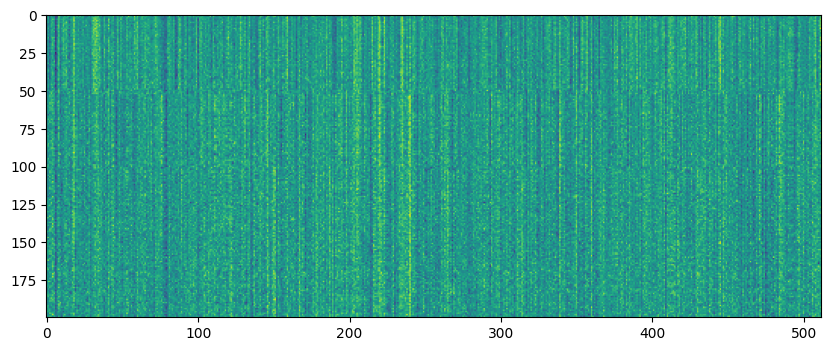

In [11]:
# plot a sample of X_train
plt.figure(figsize=(10, 10))
plt.imshow(X_train)
plt.show()